<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E5%8D%92%E8%AB%96_%E5%9C%B0%E9%9C%87%E5%BD%B1%E9%9F%BF%E3%81%AE%E6%8E%A8%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# モデル関数の定義
def model(X, a, b, c, d, e):
    quake, non_resistance_number, max_val = X  # Unpack the input data
    quake_g = (max_val ** a) * (quake ** b)
    return c * quake_g + d * (non_resistance_number ** e)

data = pd.read_csv('/content/earthquake_resistancerate_house.csv')
quake = data['quake']
non_resistance_number = data['non_resistance_house']
max_val = data['max']  # Renamed to avoid name conflict
disaster_house = data['disaster_house']

# Replace inf and NaN values with finite numbers
disaster_house = disaster_house.replace([np.inf, -np.inf], np.nan).fillna(0)
quake = quake.replace([np.inf, -np.inf], np.nan).fillna(0)
non_resistance_number = non_resistance_number.replace([np.inf, -np.inf], np.nan).fillna(0)
max_val = max_val.replace([np.inf, -np.inf], np.nan).fillna(0)

# curve_fitの使用
# The independent variables are passed as a single tuple
popt, pcov = curve_fit(model, (quake, non_resistance_number, max_val), disaster_house)

# 最適なパラメータ a, b, c, d, e
print("Estimated parameters:", popt)

Estimated parameters: [8.70983930e-05 1.60973640e-01 3.59921614e+01 2.85422521e-04
 9.99764656e-01]


<ipython-input-2-4b732053b9e3>:8: RuntimeWarning: divide by zero encountered in power
  quake_g = (max_val ** a) * (quake ** b)
<ipython-input-2-4b732053b9e3>:8: RuntimeWarning: invalid value encountered in multiply
  quake_g = (max_val ** a) * (quake ** b)


In [4]:
#P値の算出
import scipy.stats as stats # Import the stats module from scipy
# パラメータの標準誤差を共分散行列から取得
perr = np.sqrt(np.diag(pcov))

# 自由度の計算（データ数 - パラメータ数）
dof = len(disaster_house) - len(popt)

# t値を計算 (パラメータの推定値 ÷ 標準誤差)
t_values = popt / perr

# p値を計算
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_values]

# t値とp値の表示
for i, (param, t_val, p_val) in enumerate(zip(popt, t_values, p_values)):
    print(f"Parameter {i}: Estimated value = {param}, t-value = {t_val}, p-value = {p_val}")

Parameter 0: Estimated value = 8.709839300715317e-05, t-value = 8.515689325632323e-05, p-value = 0.999932087798038
Parameter 1: Estimated value = 0.1609736399485228, t-value = 1.1661805115553041, p-value = 0.24408439626192568
Parameter 2: Estimated value = 35.992161436096545, t-value = 0.7015038387316881, p-value = 0.48330736714097977
Parameter 3: Estimated value = 0.0002854225213031753, t-value = 0.6904924760219459, p-value = 0.4901974315729065
Parameter 4: Estimated value = 0.9997646564344712, t-value = 9.210093259290227, p-value = 0.0


In [ ]:
Estimated parameters: [8.70983930e-05 1.60973640e-01 3.59921614e+01 2.85422521e-04
 9.99764656e-01]
Parameter a:
  Estimate: 8.709839300715317e-05
  Standard Error: 1.0227990909084248
  t-value: 8.515689325632323e-05
  p-value: 0.999932087798038
Parameter b:
  Estimate: 0.1609736399485228
  Standard Error: 0.13803492542834256
  t-value: 1.1661805115553041
  p-value: 0.24408439626192568
Parameter c:
  Estimate: 35.992161436096545
  Standard Error: 51.3071482276847
  t-value: 0.7015038387316881
  p-value: 0.48330736714097977
Parameter d:
  Estimate: 0.0002854225213031753
  Standard Error: 0.00041336079858182804
  t-value: 0.6904924760219459
  p-value: 0.4901974315729065
Parameter e:
  Estimate: 0.9997646564344712
  Standard Error: 0.1085509807868675
  t-value: 9.210093259290227
  p-value: 0.0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


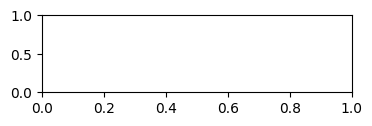

In [15]:
quake_g = (max_val) * (quake)
quake_g_log=np.log(quake_g)
quake_log = np.log(quake)
non_resistance_number_log = np.log(non_resistance_number)
max_val_log = np.log(max_val)

In [18]:
###試行錯誤２
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy import stats


# モデル関数の定義
def model(X, a, b):
    quake, non_resistance_number, max_val = X  # 入力データをアンパック
    return a * (quake_g_log) + b * (non_resistance_number)

# データの読み込み
data = pd.read_csv('/content/earthquake_resistancerate_house.csv')
quake = data['quake']
non_resistance_number = data['non_resistance_house']
max_val = data['max']
disaster_house = data['disaster_house']


# 欠損値や無限値の置換
disaster_house = disaster_house.replace([np.inf, -np.inf], np.nan).fillna(0)
quake = quake.replace([np.inf, -np.inf], np.nan).fillna(0)
non_resistance_number = non_resistance_number.replace([np.inf, -np.inf], np.nan).fillna(0)
max_val = max_val.replace([np.inf, -np.inf], np.nan).fillna(0)

quake_g = (max_val) * (quake)
quake_g_log=np.log(quake_g)
quake_log = np.log(quake)
non_resistance_number_log = np.log(non_resistance_number)
max_val_log = np.log(max_val)

# 非線形フィッティング (curve_fit)
popt, pcov = curve_fit(model, (quake, non_resistance_number, max_val), disaster_house)

# 最適なパラメータ a, b, c, d, e
print("Estimated parameters:", popt)

# パラメータの標準誤差
perr = np.sqrt(np.diag(pcov))

# 自由度（データ数 - パラメータ数）
dof = len(disaster_house) - len(popt)

# t値の計算
t_values = popt / perr

# p値の計算
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_values]

# 結果の出力
for i, param in enumerate(['a','b']):
    print(f"Parameter {param}:")
    print(f"  Estimate: {popt[i]}")
    print(f"  Standard Error: {perr[i]}")
    print(f"  t-value: {t_values[i]}")
    print(f"  p-value: {p_values[i]}")


Estimated parameters: [1. 1.]
Parameter a:
  Estimate: 1.0
  Standard Error: inf
  t-value: 0.0
  p-value: 1.0
Parameter b:
  Estimate: 1.0
  Standard Error: inf
  t-value: 0.0
  p-value: 1.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-18-82c790091be7>:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, (quake, non_resistance_number, max_val), disaster_house)


In [5]:
###試行錯誤
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy import stats

# モデル関数の定義
def model(X, a, b, c, d, e):
    quake, non_resistance_number, max_val = X  # 入力データをアンパック
    quake_g = (max_val ** a) * (quake ** b)
    return c * quake_g + d * (non_resistance_number ** e)

# データの読み込み
data = pd.read_csv('/content/earthquake_resistancerate_house.csv')
quake = data['quake']
non_resistance_number = data['non_resistance_house']
max_val = data['max']
disaster_house = data['disaster_house']

# 欠損値や無限値の置換
disaster_house = disaster_house.replace([np.inf, -np.inf], np.nan).fillna(0)
quake = quake.replace([np.inf, -np.inf], np.nan).fillna(0)
non_resistance_number = non_resistance_number.replace([np.inf, -np.inf], np.nan).fillna(0)
max_val = max_val.replace([np.inf, -np.inf], np.nan).fillna(0)

# 非線形フィッティング (curve_fit)
popt, pcov = curve_fit(model, (quake, non_resistance_number, max_val), disaster_house)

# 最適なパラメータ a, b, c, d, e
print("Estimated parameters:", popt)

# パラメータの標準誤差
perr = np.sqrt(np.diag(pcov))

# 自由度（データ数 - パラメータ数）
dof = len(disaster_house) - len(popt)

# t値の計算
t_values = popt / perr

# p値の計算
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_values]

# 結果の出力
for i, param in enumerate(['a', 'b', 'c', 'd', 'e']):
    print(f"Parameter {param}:")
    print(f"  Estimate: {popt[i]}")
    print(f"  Standard Error: {perr[i]}")
    print(f"  t-value: {t_values[i]}")
    print(f"  p-value: {p_values[i]}")


Estimated parameters: [8.70983930e-05 1.60973640e-01 3.59921614e+01 2.85422521e-04
 9.99764656e-01]
Parameter a:
  Estimate: 8.709839300715317e-05
  Standard Error: 1.0227990909084248
  t-value: 8.515689325632323e-05
  p-value: 0.999932087798038
Parameter b:
  Estimate: 0.1609736399485228
  Standard Error: 0.13803492542834256
  t-value: 1.1661805115553041
  p-value: 0.24408439626192568
Parameter c:
  Estimate: 35.992161436096545
  Standard Error: 51.3071482276847
  t-value: 0.7015038387316881
  p-value: 0.48330736714097977
Parameter d:
  Estimate: 0.0002854225213031753
  Standard Error: 0.00041336079858182804
  t-value: 0.6904924760219459
  p-value: 0.4901974315729065
Parameter e:
  Estimate: 0.9997646564344712
  Standard Error: 0.1085509807868675
  t-value: 9.210093259290227
  p-value: 0.0


<ipython-input-5-580b0d420f6f>:10: RuntimeWarning: divide by zero encountered in power
  quake_g = (max_val ** a) * (quake ** b)
<ipython-input-5-580b0d420f6f>:10: RuntimeWarning: invalid value encountered in multiply
  quake_g = (max_val ** a) * (quake ** b)
